In [51]:
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt

GROUP HYPOTHESIS: Due to historical and contemporary trends, buying a house today is not a good idea.
    
MY HYPOTHESIS: Purchasing a property prior to market crash of 2007 was financially harmful to homeowners.

In [52]:
cwd = os.getcwd()

# Construct the full file path

file_path = os.path.join(cwd, "USSTHPI.csv")
    # SOURCED FROM
    # https://fred.stlouisfed.org/series/USSTHPI
    
file_path_2 = os.path.join(cwd, "FLSTHPI.csv")
    # SOURCED FROM
    # https://fred.stlouisfed.org/series/FLSTHPI
    
file_path_3 = os.path.join(cwd, "MEHOINUSA672N.csv")
    # SOURCED FROM
    # https://fred.stlouisfed.org/series/MEHOINUSA672N
    
file_path_4 = os.path.join(cwd, "MEHOINUSFLA646N.csv")
    # SOURCED FROM
    # https://fred.stlouisfed.org/series/MEHOINUSFLA646N
    
file_path_5 = os.path.join(cwd, "FLHOWN.csv")
    # SOURCED FROM
    # https://fred.stlouisfed.org/series/FLHOWN
    
# I also sourced information on the market from here:
# https://www.investopedia.com/articles/07/subprime-blame.asp

# Make DataFrame
df = pd.read_csv(file_path)
df_fl = pd.read_csv(file_path_2)

income_us = pd.read_csv(file_path_3)
income_fl = pd.read_csv(file_path_4)

ownership_fl = pd.read_csv(file_path_5)

# print df to check
print(df.head())
print(df_fl.head())
print("\n\n")
print(income_us.head())
print(income_fl.head())
print("\n\n")
print(ownership_fl.head())

         DATE  USSTHPI
0  1975-01-01    60.06
1  1975-04-01    61.00
2  1975-07-01    61.19
3  1975-10-01    62.24
4  1976-01-01    62.89
         DATE  FLSTHPI
0  1975-01-01    65.94
1  1975-04-01    83.43
2  1975-07-01    66.80
3  1975-10-01    68.21
4  1976-01-01    67.93



         DATE  MEHOINUSA672N
0  1984-01-01          55828
1  1985-01-01          56871
2  1986-01-01          58920
3  1987-01-01          59624
4  1988-01-01          60115
         DATE  MEHOINUSFLA646N
0  1984-01-01            19785
1  1985-01-01            21343
2  1986-01-01            22849
3  1987-01-01            24489
4  1988-01-01            25406



         DATE  FLHOWN
0  1984-01-01    66.5
1  1985-01-01    67.2
2  1986-01-01    66.5
3  1987-01-01    66.3
4  1988-01-01    64.9


## Begin formatting dataframes for analysis

In [53]:
# create a concatenated df for fl and us house listings
combined_df = pd.concat([df, df_fl['FLSTHPI']], axis=1)
combined_df

,DATE,USSTHPI,FLSTHPI
0,1975-01-01,60.06,65.94
1,1975-04-01,61.00,83.43
2,1975-07-01,61.19,66.80
3,1975-10-01,62.24,68.21
4,1976-01-01,62.89,67.93
...,...,...,...
187,2021-10-01,558.02,642.29
188,2022-01-01,578.63,678.17
189,2022-04-01,618.03,735.83
190,2022-07-01,628.55,767.66


In [54]:
print(income_us.head())
print(income_fl.head())

         DATE  MEHOINUSA672N
0  1984-01-01          55828
1  1985-01-01          56871
2  1986-01-01          58920
3  1987-01-01          59624
4  1988-01-01          60115
         DATE  MEHOINUSFLA646N
0  1984-01-01            19785
1  1985-01-01            21343
2  1986-01-01            22849
3  1987-01-01            24489
4  1988-01-01            25406


In [55]:
# Filter down us income to overall date range (2004 - 2012)
filtered_us = income_us.iloc[20:29, :]
filtered_us

,DATE,MEHOINUSA672N
20,2004-01-01,63745
21,2005-01-01,64427
22,2006-01-01,64930
23,2007-01-01,65801
24,2008-01-01,63455
25,2009-01-01,63011
26,2010-01-01,61364
27,2011-01-01,60428
28,2012-01-01,60313


In [56]:
# do the same for florida income
filtered_fl = income_fl.iloc[20:29, :]
filtered_fl

,DATE,MEHOINUSFLA646N
20,2004-01-01,40535
21,2005-01-01,42990
22,2006-01-01,45676
23,2007-01-01,45794
24,2008-01-01,44857
25,2009-01-01,45631
26,2010-01-01,44066
27,2011-01-01,45105
28,2012-01-01,46071


In [57]:
# create a concatenated df for household incomes too
combined_income = pd.concat([filtered_us, filtered_fl['MEHOINUSFLA646N']], axis=1)
combined_income

,DATE,MEHOINUSA672N,MEHOINUSFLA646N
20,2004-01-01,63745,40535
21,2005-01-01,64427,42990
22,2006-01-01,64930,45676
23,2007-01-01,65801,45794
24,2008-01-01,63455,44857
25,2009-01-01,63011,45631
26,2010-01-01,61364,44066
27,2011-01-01,60428,45105
28,2012-01-01,60313,46071


In [58]:
# filter the market dataframe to 2004-2012
combined = combined_df.iloc[116:152, :]
combined

,DATE,USSTHPI,FLSTHPI
116,2004-01-01,300.36,300.55
117,2004-04-01,307.69,314.68
118,2004-07-01,319.41,334.39
119,2004-10-01,326.26,349.68
120,2005-01-01,333.73,368.36
121,2005-04-01,344.42,395.92
122,2005-07-01,354.90,423.51
123,2005-10-01,362.93,445.77
124,2006-01-01,368.69,463.20
125,2006-04-01,372.46,473.09


In [59]:
# Filter down fl ownership to overall date range (2004 - 2012)
ownership_filtered = ownership_fl.iloc[20:29, :]
ownership_filtered

,DATE,FLHOWN
20,2004-01-01,72.2
21,2005-01-01,72.4
22,2006-01-01,72.4
23,2007-01-01,71.8
24,2008-01-01,71.1
25,2009-01-01,70.9
26,2010-01-01,69.3
27,2011-01-01,69.0
28,2012-01-01,67.0


In [60]:
# Rename columns
combined = combined.rename(columns={'USSTHPI': 'HPI (US)', 'FLSTHPI': 'HPI (FL)'})
combined_income = combined_income.rename(columns={'MEHOINUSA672N': 'Median Household Income (US)'
                                                 , 'MEHOINUSFLA646N' : 'Median Household Income (FL)'})
ownership_filtered = ownership_filtered.rename(columns={'FLHOWN': 'Ownership Rate'})

print(combined.head())
print("\n")
print(combined_income.head())
print("\n")
print(ownership_filtered.head())

           DATE  HPI (US)  HPI (FL)
116  2004-01-01    300.36    300.55
117  2004-04-01    307.69    314.68
118  2004-07-01    319.41    334.39
119  2004-10-01    326.26    349.68
120  2005-01-01    333.73    368.36


          DATE  Median Household Income (US)  Median Household Income (FL)
20  2004-01-01                         63745                         40535
21  2005-01-01                         64427                         42990
22  2006-01-01                         64930                         45676
23  2007-01-01                         65801                         45794
24  2008-01-01                         63455                         44857


          DATE  Ownership Rate
20  2004-01-01            72.2
21  2005-01-01            72.4
22  2006-01-01            72.4
23  2007-01-01            71.8
24  2008-01-01            71.1


## Analysis for overall house listings

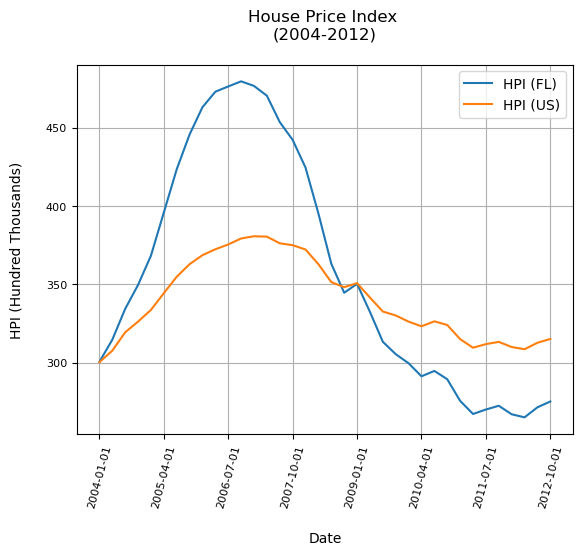

In [61]:
# Line graph national + florida
combined.plot(x='DATE', y=['HPI (FL)', 'HPI (US)'])

# labels
plt.title('House Price Index \n(2004-2012)\n')
plt.ylabel('HPI (Hundred Thousands)\n')
plt.xlabel('\nDate')
plt.xticks(rotation=75, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True)


# save plot
plt.savefig('2004-2012_HPI_combined.png', bbox_inches='tight')

# Show the plot
plt.show()

This graph was made in order to build my central argument, that housing prices rising has happened in the past and the outcome of these rapid increases is predictable. In this graph, we see a massive spike in prices and a sudden drop - the market crash.

The market crash was damaging because the mortgages and loans people took out to buy their houses were suddenly worth a lot less - houses dropped in prices overall.

## Analysis for recession years

In [62]:
# Select rows 130 to 141 (recession)
combined_subset = combined_df.iloc[130:141, :]
combined_subset

,DATE,USSTHPI,FLSTHPI
130,2007-07-01,376.28,453.68
131,2007-10-01,375.07,442.35
132,2008-01-01,372.32,424.62
133,2008-04-01,362.93,395.31
134,2008-07-01,351.49,363.23
135,2008-10-01,348.25,344.68
136,2009-01-01,350.83,350.41
137,2009-04-01,341.63,332.46
138,2009-07-01,332.72,313.39
139,2009-10-01,330.19,305.48


In [63]:
# rename columns again
combined_subset = combined_subset.rename(columns={'USSTHPI': 'HPI (US)', 'FLSTHPI': 'HPI (FL)'})
combined_subset

,DATE,HPI (US),HPI (FL)
130,2007-07-01,376.28,453.68
131,2007-10-01,375.07,442.35
132,2008-01-01,372.32,424.62
133,2008-04-01,362.93,395.31
134,2008-07-01,351.49,363.23
135,2008-10-01,348.25,344.68
136,2009-01-01,350.83,350.41
137,2009-04-01,341.63,332.46
138,2009-07-01,332.72,313.39
139,2009-10-01,330.19,305.48


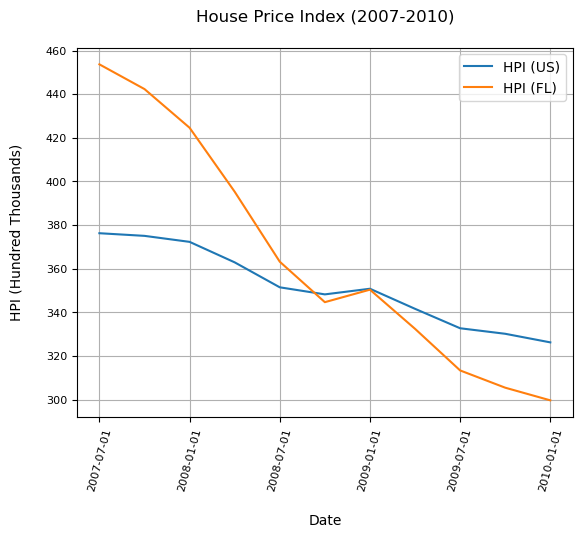

In [64]:
# Line graph national + florida
combined_subset.plot(x='DATE', y=['HPI (US)', 'HPI (FL)'])

# labels
plt.title('House Price Index (2007-2010)\n')
plt.ylabel('HPI (Hundred Thousands)\n')
plt.xlabel('\nDate')
plt.xticks(rotation=75, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True)
# save plot
plt.savefig('2007-2010_HPI_combined.png', bbox_inches='tight')
# Show the plot
plt.show()

## Analysis for household income

In [65]:
combined_income

,DATE,Median Household Income (US),Median Household Income (FL)
20,2004-01-01,63745,40535
21,2005-01-01,64427,42990
22,2006-01-01,64930,45676
23,2007-01-01,65801,45794
24,2008-01-01,63455,44857
25,2009-01-01,63011,45631
26,2010-01-01,61364,44066
27,2011-01-01,60428,45105
28,2012-01-01,60313,46071


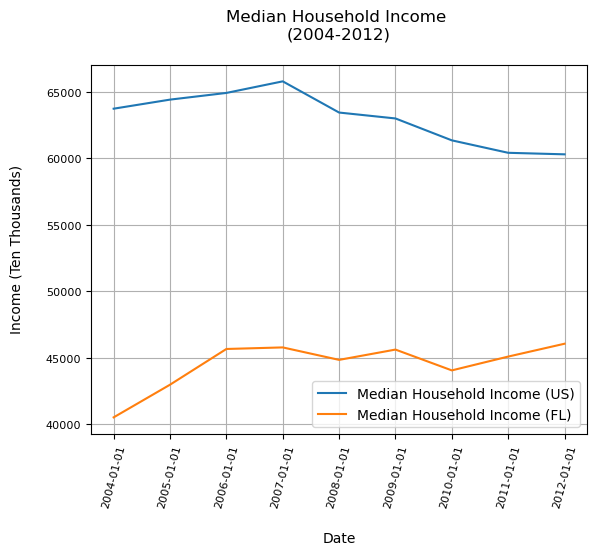

In [66]:
# Chart for incomes 2004-2012 (combined)
combined_income.plot(x='DATE', y=['Median Household Income (US)', 'Median Household Income (FL)'])

# labels
plt.title('Median Household Income \n(2004-2012)\n')
plt.ylabel('Income (Ten Thousands)\n')
plt.xlabel('\nDate')
plt.xticks(rotation=75, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True)

# save plot
plt.savefig('2004-2012_income_combined.png', bbox_inches='tight')
# Show the plot
plt.show()

Median incomes did not keep up with the market crash. I argue that a consequence of this is people not being able to afford their mortgages and other expenses because they took out loans that no longer hold value.

## Homeownership analysis

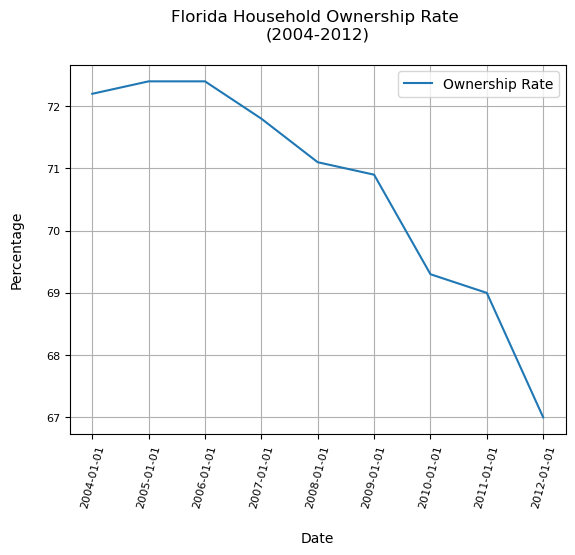

In [67]:
# Chart for incomes 2004-2012 (combined)
ownership_filtered.plot(x='DATE', y=['Ownership Rate'])

# labels
plt.title('Florida Household Ownership Rate \n(2004-2012)\n')
plt.ylabel('Percentage\n')
plt.xlabel('\nDate')
plt.xticks(rotation=75, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True)
# save plot
plt.savefig('2004-2012_ownership_fl.png', bbox_inches='tight')
# Show the plot
plt.show()

Homeownership dipped. During the market crash, many people lost their homes.

In [68]:
# Provide more context, go further until latest date
# get ending index through tail
ownership_fl.tail()

,DATE,FLHOWN
34,2018-01-01,65.5
35,2019-01-01,66.0
36,2020-01-01,68.7
37,2021-01-01,67.2
38,2022-01-01,67.3


In [69]:
more_ownership = ownership_fl.iloc[23:35, :]
more_ownership

,DATE,FLHOWN
23,2007-01-01,71.8
24,2008-01-01,71.1
25,2009-01-01,70.9
26,2010-01-01,69.3
27,2011-01-01,69.0
28,2012-01-01,67.0
29,2013-01-01,66.1
30,2014-01-01,64.9
31,2015-01-01,64.8
32,2016-01-01,64.3


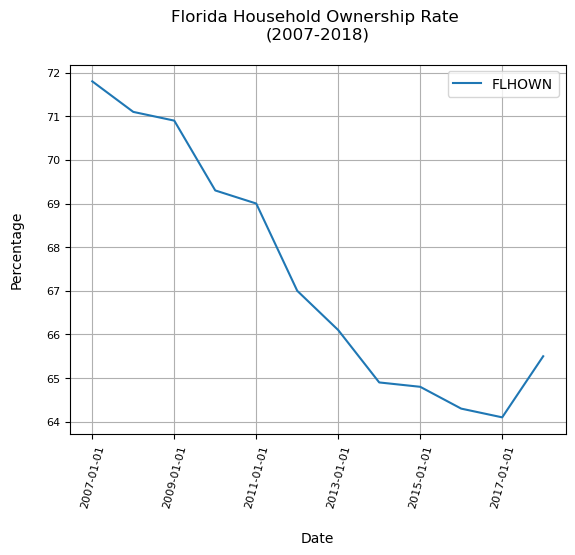

In [70]:
# plot again with this new data
more_ownership.plot(x='DATE', y=['FLHOWN'])

# labels
plt.title('Florida Household Ownership Rate \n(2007-2018)\n')
plt.ylabel('Percentage\n')
plt.xlabel('\nDate')
plt.xticks(rotation=75, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True)
# save plot
plt.savefig('2007-2018_ownership_fl.png', bbox_inches='tight')
# Show the plot
plt.show()

In [71]:
# lets get some HPI data on this expanded timeframe
future = combined_df.iloc[128:173, :]
future = future.rename(columns={'USSTHPI': 'HPI (US)', 'FLSTHPI': 'HPI (FL)'})
future

,DATE,HPI (US),HPI (FL)
128,2007-01-01,380.78,476.78
129,2007-04-01,380.53,470.54
130,2007-07-01,376.28,453.68
131,2007-10-01,375.07,442.35
132,2008-01-01,372.32,424.62
133,2008-04-01,362.93,395.31
134,2008-07-01,351.49,363.23
135,2008-10-01,348.25,344.68
136,2009-01-01,350.83,350.41
137,2009-04-01,341.63,332.46


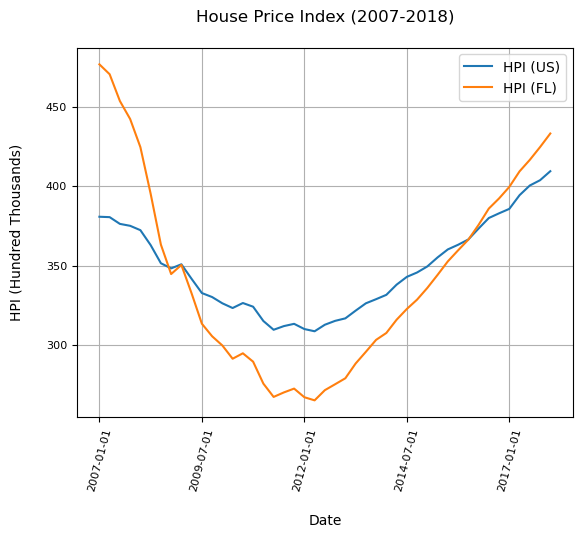

In [72]:
# Line graph national + florida
future.plot(x='DATE', y=['HPI (US)', 'HPI (FL)'])

# labels
plt.title('House Price Index (2007-2018)\n')
plt.ylabel('HPI (Hundred Thousands)\n')
plt.xlabel('\nDate')
plt.xticks(rotation=75, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True)
# save plot
plt.savefig('2007-2018_HPI_combined.png', bbox_inches='tight')
# Show the plot
plt.show()

The impact of the market crash was a decade later, and even today. 

This data supports the fact that after the housing market crash, homeowners found the values of their homes dropping well below the amount of money they borrowed to finance the property. Many homeowners suffered great financial losses including loss of property, as seen in our analysis, which many did not recover from. This analysis will support the greater hypothesis that due to historical and contemporary trends, buying a house is not a good idea.